Dealing with text


In [8]:
import pandas as pd
import string
import nltk.corpus
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from cleantext import clean
import numpy as np
from sklearn.metrics import f1_score,classification_report
from nltk.stem.snowball import SnowballStemmer
import re
import matplotlib.pyplot as plt


In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv 
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from skimage.transform import resize
%matplotlib inline
from skimage.io import imread, imshow
from skimage import filters
from skimage import feature
import numpy as np
from skimage.feature import hog
from skimage.filters import prewitt_h,prewitt_v
import skimage
import skimage.transform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [43]:
df=pd.read_csv("labels.csv")
df

In [61]:
def cleaningText(text):
    stop = stopwords.words('english')
    text=str(text)
    text=text.lower()
    text=text.translate(str.maketrans('', '', string.punctuation)) #remove punctuation
    tokens = nltk.word_tokenize(text) #removing repated words
    ordered_tokens = set()
    result = []
    for word in tokens:
        if word not in ordered_tokens:
            ordered_tokens.add(word)
            result.append(word)
    text=" ".join(result)
    text= ''.join([i for i in text if not i.isdigit()]) #removing digits
    text= " ".join(text.split()) #removing extra spaces
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text) #remove extended asci etc
#     gfg = TextBlob(text)
#     text= gfg.correct()
    text = " ".join([word for word in text.split() if word not in (stop)]) #remove stopwords
    tokens = nltk.word_tokenize(text) #tokens
    lemmatizer = WordNetLemmatizer() #limitzer
    snowball = SnowballStemmer('english')#snowball
    t = [snowball.stem(t) for t in text]
    text="".join(t)
    return text

In [13]:
filters=[]
for i in df.index:
    text=df.iloc[i,2]
    filters.append(cleaningText(text)) 
order={"very_positive":1,"positive":1,"neutral":0,"negative":-1,"very_negative":-1}
df["labels"]=df["overall_sentiment"].map(order)
df["clean_text"]=filters

In [15]:
newDf=df[["image_name","clean_text",'labels']]

In [16]:
# newDf

,image_name,clean_text,labels
0,image_1.jpg,look friend lightyear sohalikut trend play yea...,1
1,image_2.jpeg,best yearchallenge completed less years kudus ...,1
2,image_3.JPG,sam thorne strippin follow saw everyone postin...,1
3,image_4.png,year challenge sweet dee edition,1
4,image_5.png,year challenge filter hilarious memes,0
...,...,...,...
6987,image_6988.jpg,tuesday mardi gras wednesday valentines friday...,0
6988,image_6989.jpg,must watch movies iti chennai memes maanagaram...,0
6989,image_6990.png,less talking planning soda junk food complaini...,1
6990,image_6991.jpg,time fantasy one unless make arhtisticlicensecom,1


In [21]:
c=np.arange(0,22501)
images=pd.read_csv("canny_data.csv",names=c)


In [105]:
# images

In [25]:
images.rename(columns = {0:'image_name'}, inplace = True)

final=pd.merge(newDf,images,how='inner', on = 'image_name')
# images


In [27]:
final = final.dropna(subset=['clean_text'])


In [30]:
import pickle
with open("combineData.pkl","wb")as file:
    pickle.dump(final,file)

In [32]:
final["labels"].value_counts()

 1    4160
 0    2201
-1     631
Name: labels, dtype: int64

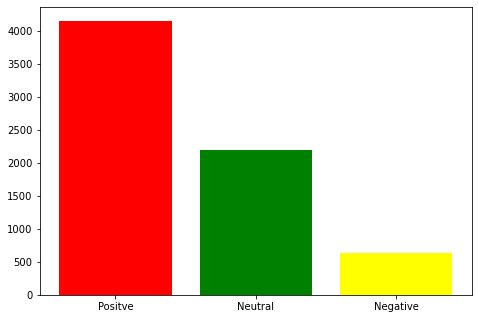

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Positve','Neutral','Negative']
ax.bar(langs,final["labels"].value_counts(),color=["red","green","yellow"])
plt.show()

# Data Augmentation in Negative label

In [38]:
!pip install textattack

^C


In [42]:
c=final["labels"]==-1
tempDf=final[c]
tempDf.drop(['image_name'], axis=1,inplace=True)
tempDf.drop(['labels'], axis=1,inplace=True)
tempDf.drop(['clean_text'], axis=1,inplace=True)
tempDf

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4732\1766140111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf.drop(['image_name'], axis=1,inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4732\1766140111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf.drop(['labels'], axis=1,inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4732\1766140111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf

,1,2,3,4,5,6,7,8,9,10,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,22500
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
filename = "canny_data.csv"
from csv import writer
def writeinCSV(List):
    with open(filename, 'a+',newline='') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(List)
        f_object.close()

# Image Augmentation through rotation

In [104]:
# tempDf        ratation of negative labels
roationImage=[]
for i in range(0,len(tempDf)):
    image=np.array(tempDf.iloc[i]) #taking negative image
    image=image.reshape((150,150))     #reshapping to 2D
    image=skimage.transform.rotate(image,40)  #negative conversion
    image=image.astype(bool)                  #convert to bool for conversion
    image= np.array(np.concatenate(image).flat)       #back to flat
    image=image.astype(int)           #back into 1 and 0
    flat =np.append(888+i,image)   #appending label
    writeinCSV(flat)



In [107]:
c=np.arange(0,22501)
fimages=pd.read_csv("canny_data.csv",names=c)
fimages

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4732\1610884182.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  fimages=pd.read_csv("canny_data.csv",names=c)


,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,22500
0,image_1.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,image_10.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,image_100.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,image_1000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,image_1001.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7618,1514,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7619,1515,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7620,1516,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7621,1517,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
import pickle
with open("combineRotation.pkl","wb")as file:
    pickle.dump(fimages,file)

# Text Augmentation  

In [71]:
text=pd.read_csv("replaced.csv")
text

,Unnamed: 0,clean_text
0,0,['dont get car strangers meet people internet ...
1,1,['eld challenge lit af b erg wow transformation']
2,2,['probably first man year challenge Madras pas...
3,3,['antivaxx kids image someone year challenge']
4,4,['hawkeye important infinity warfare though']
...,...,...
626,626,['nerve friend gives crush walks room']
627,627,['nightmares work']
628,628,['baby mr bean funny characterisation']
629,629,['face memecentercom theres substitute math gr...


In [73]:
for i in range(0,631):
    t=text.iloc[i,1]
    text.iloc[i,1]=cleaningText(t) 
dataText=text.clean_text.tolist()

In [113]:
newDf

,image_name,clean_text,labels
0,image_1.jpg,look friend lightyear sohalikut trend play yea...,1
1,image_2.jpeg,best yearchallenge completed less years kudus ...,1
2,image_3.JPG,sam thorne strippin follow saw everyone postin...,1
3,image_4.png,year challenge sweet dee edition,1
4,image_5.png,year challenge filter hilarious memes,0
...,...,...,...
6987,image_6988.jpg,tuesday mardi gras wednesday valentines friday...,0
6988,image_6989.jpg,must watch movies iti chennai memes maanagaram...,0
6989,image_6990.png,less talking planning soda junk food complaini...,1
6990,image_6991.jpg,time fantasy one unless make arhtisticlicensecom,1


In [114]:
newDf
image_name=[]
clean_text=[]
labels=[]
for i in range(0,len(newDf)):
    image_name.append(newDf.iloc[i,0])
    clean_text.append(newDf.iloc[i,1])
    labels.append(newDf.iloc[i,2])

In [115]:
for i in range(0,len(dataText)):
    image_name.append(888+i)
    clean_text.append(dataText[i])
    labels.append(-1)

In [123]:
augText=pd.DataFrame()
augText["image_name"]=image_name
augText["clean_text"]=clean_text
augText["labels"]=labels

In [124]:
augText

,image_name,clean_text,labels
0,image_1.jpg,look friend lightyear sohalikut trend play yea...,1
1,image_2.jpeg,best yearchallenge completed less years kudus ...,1
2,image_3.JPG,sam thorne strippin follow saw everyone postin...,1
3,image_4.png,year challenge sweet dee edition,1
4,image_5.png,year challenge filter hilarious memes,0
...,...,...,...
7618,1514,nerve friend gives crush walks room,-1
7619,1515,nightmares work,-1
7620,1516,baby mr bean funny characterisation,-1
7621,1517,face memecentercom theres substitute math grade,-1


In [128]:
fimages.rename(columns = {0:'image_name'}, inplace = True)


# Merging augmented and real data of both image and text

In [166]:
fData=pd.merge(augText,fimages,how='inner', on = 'image_name')

In [167]:
fData

,image_name,clean_text,labels,1,2,3,4,5,6,7,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,22500
0,image_1.jpg,look friend lightyear sohalikut trend play yea...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,image_2.jpeg,best yearchallenge completed less years kudus ...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,image_3.JPG,sam thorne strippin follow saw everyone postin...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,image_4.png,year challenge sweet dee edition,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,image_5.png,year challenge filter hilarious memes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,1514,nerve friend gives crush walks room,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7603,1515,nightmares work,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7604,1516,baby mr bean funny characterisation,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7605,1517,face memecentercom theres substitute math grade,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
import pickle
with open("fullFinal.pkl","wb")as file:
    pickle.dump(fData,file)
fData= fData.dropna(subset=['clean_text'])
fData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7607 entries, 0 to 7606
Columns: 22503 entries, image_name to 22500
dtypes: int64(22501), object(2)
memory usage: 1.3+ GB


In [1]:
import pickle
with open("fullFinal.pkl","rb")as file:
    fData=pickle.load(file)
fData

,image_name,clean_text,labels,1,2,3,4,5,6,7,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,22500
0,image_1.jpg,look friend lightyear sohalikut trend play yea...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,image_2.jpeg,best yearchallenge completed less years kudus ...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,image_3.JPG,sam thorne strippin follow saw everyone postin...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,image_4.png,year challenge sweet dee edition,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,image_5.png,year challenge filter hilarious memes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,1514,nerve friend gives crush walks room,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7603,1515,nightmares work,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7604,1516,baby mr bean funny characterisation,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7605,1517,face memecentercom theres substitute math grade,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
fData = fData.dropna(subset=['clean_text'])
fData['clean_text'].isnull().sum()

0

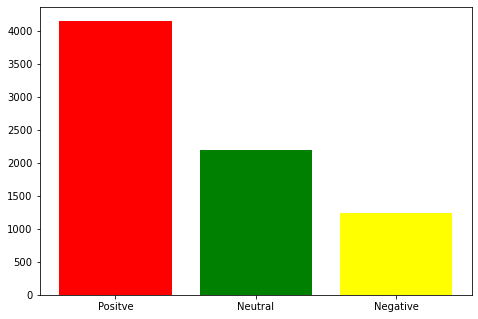

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Positve','Neutral','Negative']
ax.bar(langs,fData["labels"].value_counts(),color=["red","green","yellow"])
plt.show()

# splitting data combined 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
#for image
X_image= fData.drop(["labels",'clean_text','image_name'], axis = 1)

In [25]:
#for text
X_text=fData.clean_text
y=fData.labels
textMachine=pd.DataFrame({"text":X_text,'labels':y})
textMachine.to_csv("textMachine.csv")

In [26]:
vectorizer = TfidfVectorizer(lowercase=True,)
X_text = vectorizer.fit_transform(X_text)

In [27]:
X_train_t, X_test_t, y_train, y_test = train_test_split(X_text, y, test_size=0.30,random_state=35,shuffle=True) # 70% training and 30% test

In [28]:
X_train_image, X_test_image, y_train, y_test = train_test_split(X_image, y, test_size=0.30,random_state=35,shuffle=True) # 70% training and 30% test

In [88]:
X_train_image

,1,2,3,4,5,6,7,8,9,10,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,22500
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df=pd.DataFrame(X_text.toarray(),columns=vectorizer.get_feature_names_out())
df

,aa,aaaaaaaaa,aaaaaaaahhh,aaaaaaaand,aaaand,aaah,aaand,aalu,aanm,aaron,...,zuckerbergmemes,zuckerbergts,zuckerburg,zuckerphobia,zultra,zulu,zut,zuul,zxcvbnm,zyzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(n_estimators=13,criterion='entropy',)
clf = clf.fit(X_train_t, y_train)
pred=clf.predict(X_test_t)
clf.score(X_test_t,y_test)
print("F1 Score: ",f1_score(y_test, pred,average='macro')) 
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

F1 Score:  0.4527244094646374
              precision    recall  f1-score   support

          -1       0.72      0.39      0.51       390
           0       0.30      0.12      0.17       662
           1       0.57      0.84      0.68      1231

    accuracy                           0.55      2283
   macro avg       0.53      0.45      0.45      2283
weighted avg       0.52      0.55      0.50      2283

[[ 153   23  214]
 [  18   79  565]
 [  41  158 1032]]


In [33]:
# import pickle
# with open("randomT_finale.pkl",'wb') as file:
#     pickle.dump(clf,file)

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator="deprecated",n_estimators=10, random_state=0)
clf = clf.fit(X_train_t, y_train)
pred=clf.predict(X_test_t)
clf.score(X_test_t,y_test)
print("F1 Score: ",f1_score(y_test, pred,average='macro')) 
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

F1 Score:  0.46900244334743196
              precision    recall  f1-score   support

          -1       0.60      0.41      0.48       390
           0       0.35      0.21      0.26       662
           1       0.58      0.77      0.66      1231

    accuracy                           0.54      2283
   macro avg       0.51      0.46      0.47      2283
weighted avg       0.52      0.54      0.51      2283

[[158  40 192]
 [ 37 139 486]
 [ 67 222 942]]


In [37]:
# import pickle
# with open("baggingT_finale.pkl",'wb') as file:
#     pickle.dump(clf,file)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_t, y_train)
pred=clf.predict(X_test_t)
clf.score(X_test_t,y_test)
print("F1 Score: ",f1_score(y_test, pred,average='macro')) 
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

F1 Score:  0.4717899705692526
              precision    recall  f1-score   support

          -1       0.56      0.49      0.52       390
           0       0.32      0.22      0.26       662
           1       0.58      0.70      0.63      1231

    accuracy                           0.52      2283
   macro avg       0.48      0.47      0.47      2283
weighted avg       0.50      0.52      0.51      2283

[[191  48 151]
 [ 47 146 469]
 [106 265 860]]


In [40]:
# import pickle
# with open("decisionT_finale.pkl",'wb') as file:
#     pickle.dump(clf,file)

In [94]:
from sklearn.ensemble import VotingClassifier
forest= RandomForestClassifier(n_estimators=15)
tree = DecisionTreeClassifier(random_state=42,criterion='gini')
kn =BaggingClassifier(base_estimator="deprecated",n_estimators=10, random_state=0)
combined=VotingClassifier(estimators=[('f',forest),('t',tree),('kn',kn)],voting="hard")
combined.fit(X_train_t,y_train)
pred=combined.predict(X_test_t)
print("F1 Score: ",f1_score(y_test, pred,average='macro')) 
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

F1 Score:  0.4642749894897
              precision    recall  f1-score   support

          -1       0.61      0.46      0.53       390
           0       0.32      0.14      0.20       662
           1       0.58      0.80      0.67      1231

    accuracy                           0.55      2283
   macro avg       0.50      0.47      0.46      2283
weighted avg       0.51      0.55      0.51      2283

[[180  29 181]
 [ 34  94 534]
 [ 80 171 980]]


In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='sag')
clf=clf.fit(X_train_image, y_train)
pred=clf.predict(X_test_image)
print("F1 Score: ",f1_score(y_test, pred,average='macro')) 
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

F1 Score:  0.5145057000035963
              precision    recall  f1-score   support

          -1       0.84      0.49      0.62       390
           0       0.31      0.25      0.28       662
           1       0.58      0.71      0.64      1231

    accuracy                           0.54      2283
   macro avg       0.58      0.49      0.51      2283
weighted avg       0.55      0.54      0.53      2283

[[193  41 156]
 [ 11 168 483]
 [ 26 325 880]]


In [17]:
# import pickle
# with open("logistic_finale.pkl",'wb') as file:
#     pickle.dump(clf,file)

In [18]:
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()
clf=clf.fit(X_train_image, y_train)
pred=clf.predict(X_test_image)
print("F1 Score: ",f1_score(y_test, pred,average='macro')) 
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

F1 Score:  0.5447484072409624
              precision    recall  f1-score   support

          -1       1.00      0.50      0.66       390
           0       0.33      0.42      0.37       662
           1       0.60      0.60      0.60      1231

    accuracy                           0.53      2283
   macro avg       0.64      0.51      0.54      2283
weighted avg       0.59      0.53      0.54      2283

[[194  88 108]
 [  0 279 383]
 [  0 489 742]]


In [19]:
# import pickle
# with open("gaussian_finale.pkl",'wb') as file:
#     pickle.dump(clf,file)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf=clf.fit(X_train_image, y_train)
pred=clf.predict(X_test_image)
print("F1 Score: ",f1_score(y_test, pred,average='macro')) 
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))

F1 Score:  0.5066489721219382
              precision    recall  f1-score   support

          -1       0.84      0.48      0.61       390
           0       0.31      0.18      0.23       662
           1       0.59      0.79      0.67      1231

    accuracy                           0.56      2283
   macro avg       0.58      0.49      0.51      2283
weighted avg       0.55      0.56      0.54      2283

[[189  45 156]
 [  7 122 533]
 [ 29 226 976]]


In [22]:
# import pickle
# with open("gradient_finale.pkl",'wb') as file:
#     pickle.dump(clf,file)

# Importing all models

# Text

In [41]:
import pickle
with open("randomT_finale.pkl",'rb')as file:
    random=pickle.load(file)

In [42]:
import pickle
with open("baggingT_finale.pkl",'rb')as file:
    bagging=pickle.load(file)

In [43]:
import pickle
with open("decisionT_finale.pkl",'rb')as file:
    decison=pickle.load(file)

# Image

In [44]:
import pickle
with open("logistic_finale.pkl",'rb')as file:
    logistic=pickle.load(file)

In [45]:
import pickle
with open("gaussian_finale.pkl",'rb')as file:
    gaussian=pickle.load(file)

In [49]:
import pickle
with open("gradient_finale.pkl",'rb')as file:
    gradient=pickle.load(file)

# Combined F1 Score

In [50]:
pred1=random.predict(X_test_t)
pred2=bagging.predict(X_test_t)
pred3=decison.predict(X_test_t)
pred4=logistic.predict(X_test_image)
pred5=gaussian.predict(X_test_image)
pred6=gradient.predict(X_test_image)


In [78]:
import numpy as np
from scipy import stats
a = np.array([pred1,pred2,pred3,pred4,pred5,pred6])
modePred = stats.mode(a)
print(modePred[0])

[[ 1  1 -1 ... -1  1 -1]]


In [79]:
fpred= np.array(np.concatenate(modePred[0]).flat)       #back to flat
fpred


array([ 1,  1, -1, ..., -1,  1, -1], dtype=int64)

In [80]:
print("F1 Score: ",f1_score(y_test, fpred,average='macro')) 
print(classification_report(y_test, fpred))
print(confusion_matrix(y_test,fpred))


F1 Score:  0.5430273229488809
              precision    recall  f1-score   support

          -1       0.84      0.62      0.71       390
           0       0.32      0.18      0.23       662
           1       0.60      0.79      0.68      1231

    accuracy                           0.58      2283
   macro avg       0.59      0.53      0.54      2283
weighted avg       0.56      0.58      0.56      2283

[[242  26 122]
 [ 14 121 527]
 [ 32 227 972]]
